## 범주 vs 숫자

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [3]:
# 다이아몬드 가격
diamonds = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv')
diamonds = diamonds.sample(3000, random_state = 2022)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
50989,0.31,Ideal,G,VS2,61.6,55.0,544,4.37,4.39,2.70
42221,0.33,Ideal,E,IF,62.1,55.0,1289,4.43,4.46,2.76
42307,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96
27207,2.02,Very Good,F,SI1,62.7,59.0,17530,7.97,8.03,5.02
22207,1.50,Good,H,VS1,63.4,59.0,10256,7.20,7.29,4.59


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


### 범주 --> 숫자 : 시각화

 *시각화는 barplot과 boxplot을 사용한다. 하지만, barplot을 주로 사용하고
boxplot는 참고용으로만 본다.

titanic 생존여부와 성별은 차이가 있나?

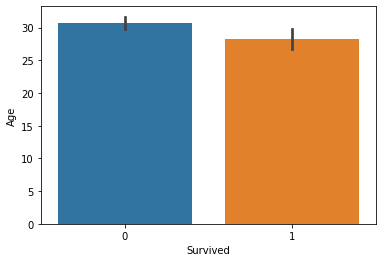

In [9]:
#barplot 시각화

sns.barplot(x='Survived', y='Age', data=titanic)
plt.show()

신뢰구간이란?
> 신뢰구간은 표본의 평균이 있으면 +- .196*se 의 차이이다. 표준오차가 크면 길이가 길어지고, 적으면 짧아진다. 표준오차가 신뢰구간의 길이를 결정한다. 또한 신뢰구간이 길면 데이터의 수집 양이 적다고 볼 수 있다.

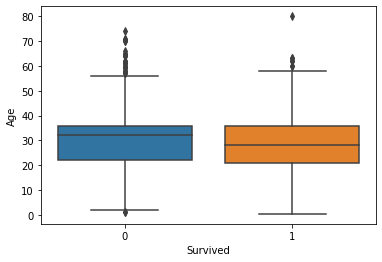

In [10]:
# boxplot 시각화

sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

> 평균을 비교해보고 신뢰구간이 겹치냐, 벌어지냐를 관련이 있다,없다 말할 수 있지만, 눈으로 보는것만 가지고 확연한 차이가 없으면 알기 힘들기 때문에 수치화를 통해 관계를 알아보자.

### 범주--> 숫자 : 수치화

> t-test(두 범주)와 분산분석(세 범주 이상)을 통하여 수치화 할 수 있음.

titanic 데이터에서 생존여부에 따라 나이의 차이가 있을까?

In [12]:
# 범주별로 데이터를 나누고 t-test 수행!

died = titanic.loc[titanic['Survived'] == 0, 'Age']
survived = titanic.loc[titanic['Survived'] == 1, 'Age']

In [14]:
died

0      22.00
4      35.00
5      32.37
6      54.00
7       2.00
       ...  
884    25.00
885    39.00
886    27.00
888    21.77
890    32.00
Name: Age, Length: 549, dtype: float64

In [16]:
spst.ttest_ind(died,survived)
# 의미 : survived 평균에 비해서 died의 평균이 얼마냐 ? 
# statistic의 절대값이 클수록 차이가 크다. +이면 앞에 있는 값이 크고,
# -가 나오면 뒤에 있는 값이 크다. 기준값은 존재하지 않음.
# 값이 클수록 대립가설이 맞다. 라고 볼 수 있음

Ttest_indResult(statistic=2.6686741711011606, pvalue=0.007753857024893963)

>데이터를 범주별로 나눌때 NaN 값이 존재하면 안된다.